In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import warnings
plt.style.use('seaborn-darkgrid')
warnings.filterwarnings("ignore") 
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hosue-prices/sample_submission.csv
/kaggle/input/hosue-prices/train.csv
/kaggle/input/hosue-prices/test.csv


Read and understand the Data

In [2]:
train = pd.read_csv('/kaggle/input/hosue-prices/train.csv')
test = pd.read_csv('/kaggle/input/hosue-prices/test.csv')


In [3]:

train.info()
print("-"*69)
print("-"*69)
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
train.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

<AxesSubplot:>

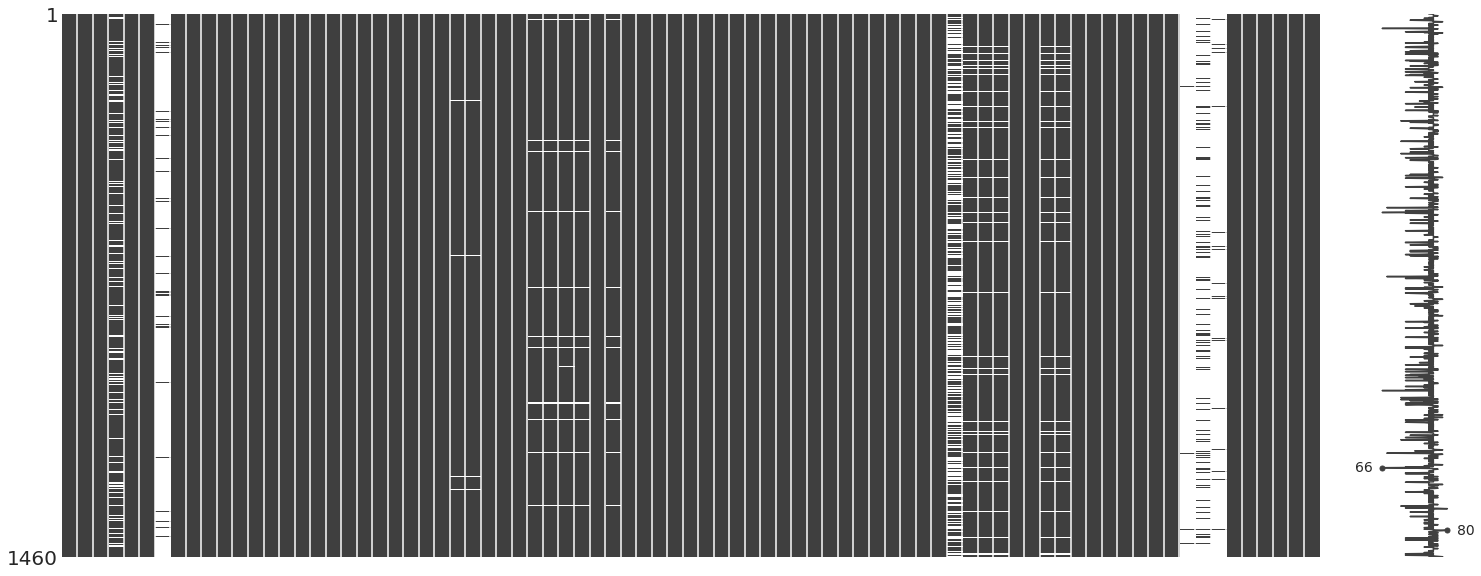

In [5]:
import missingno
missingno.matrix(train)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

<AxesSubplot:>

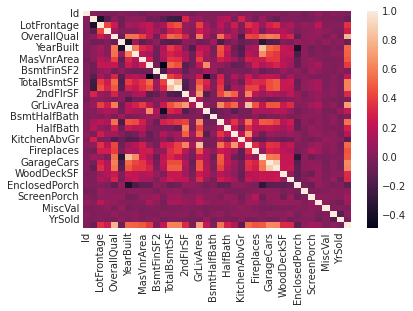

In [6]:
import seaborn as sns 
print(train.corr())
 
sns.heatmap(train.corr())

In [7]:
train.corr().sort_values("SalePrice", ascending = False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [8]:
#comparing SalePrice rate by YearBuilt
print(train.YearBuilt.value_counts())
pd.pivot_table(train,index='SalePrice',columns='YearBuilt', aggfunc='count')


2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64


1stFlrSF                                               ... YrSold  \
YearBuilt     1872 1875 1880 1882 1885 1890 1892 1893 1898 1900  ...   2001   
SalePrice                                                        ...          
34900          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
35311          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
37900          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
39300          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
40000          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
582933         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
611657         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
625000         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
745000         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
755000         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   

                                                        
YearBuilt 2002 2003 2004 2005 2006 2007 2008 2009 2010  
SalePrice                                               
34900      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
35311      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
37900      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
39300      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
40000      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  
582933     NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  
611657     NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  
625000     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
745000     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
755000     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[663 rows x 8848 columns]

# Checking for null values in train and test set

In [9]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [10]:

null_value = pd.DataFrame()
null_value['variable'] = test.columns
null_value['Train'] = train.drop(labels='SalePrice',axis=1).isnull().sum().to_list()
null_value['Test']=test.isnull().sum().to_list()
null_value

,variable,Train,Test
0,Id,0,0
1,MSSubClass,0,0
2,MSZoning,0,4
3,LotFrontage,259,227
4,LotArea,0,0
...,...,...,...
75,MiscVal,0,0
76,MoSold,0,0
77,YrSold,0,0
78,SaleType,0,1


# Selecting the non-null variable in both training and testing Dataset

In [11]:
no_null_col = null_value[(null_value['Train']==0) & (null_value['Test']==0)].variable.to_list()


In [12]:
df_train = train[no_null_col]
df_train['SalePrice'] = train['SalePrice']
df_test = test[no_null_col]

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0


In [14]:
# Code for ploting boxplot and distplot of feature
def plot_hist_box(data):
    figure, axis = plt.subplots(1,2,figsize=(15, 5))
    plt.suptitle(data.name)
    axis[0].boxplot(data)
    axis[1] = sns.distplot(data)
    axis[1].lines[0].set_color('crimson')
    rect = plt.Rectangle(
    (0, 0), 1, 1, fill=False, color="k", lw=3, transform=figure.transFigure, figure=figure)
    figure.patches.extend([rect])
    plt.show()

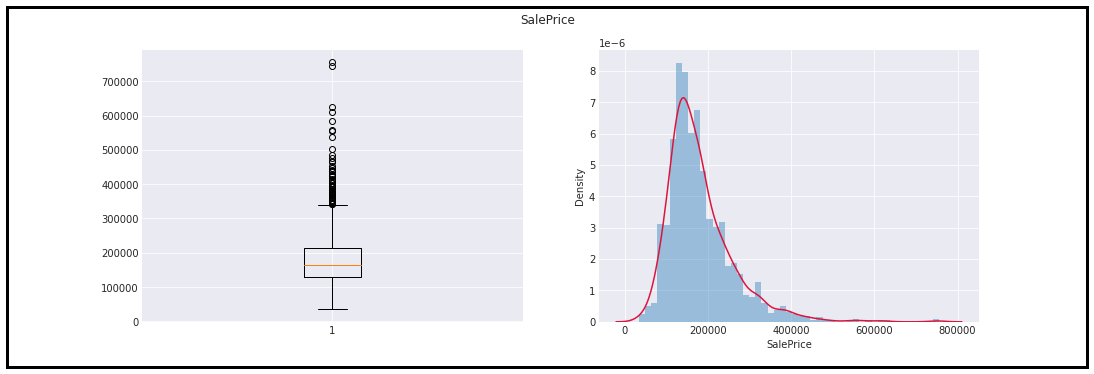

In [15]:
plot_hist_box(df_train.SalePrice)

# Feature Enginering 

In [16]:
#We can get information of the age of house with the help of YrSold and YearBuilt
df_train['House_Age'] = df_train.YrSold - df_train.YearBuilt
df_train['RemodAge']  = df_train.YrSold - df_train.YearRemodAdd
df_train.drop(labels=['YrSold','YearBuilt','YearRemodAdd'],inplace=True,axis=1)

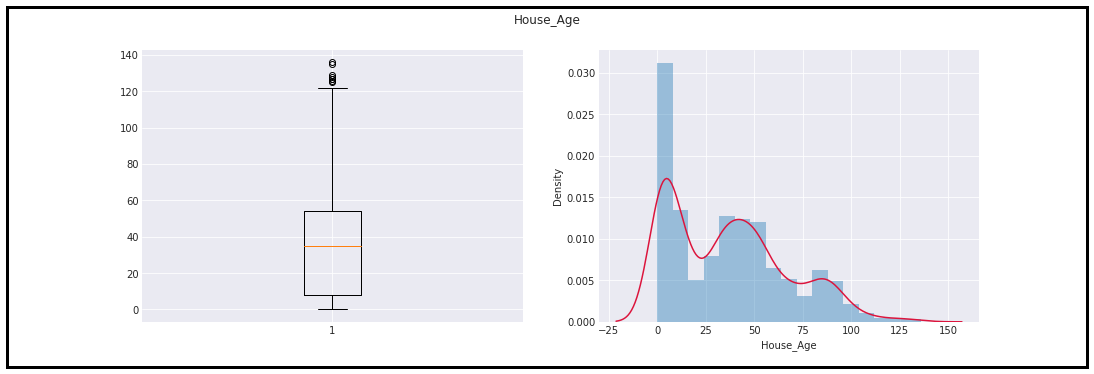

In [17]:
plot_hist_box(df_train.House_Age)

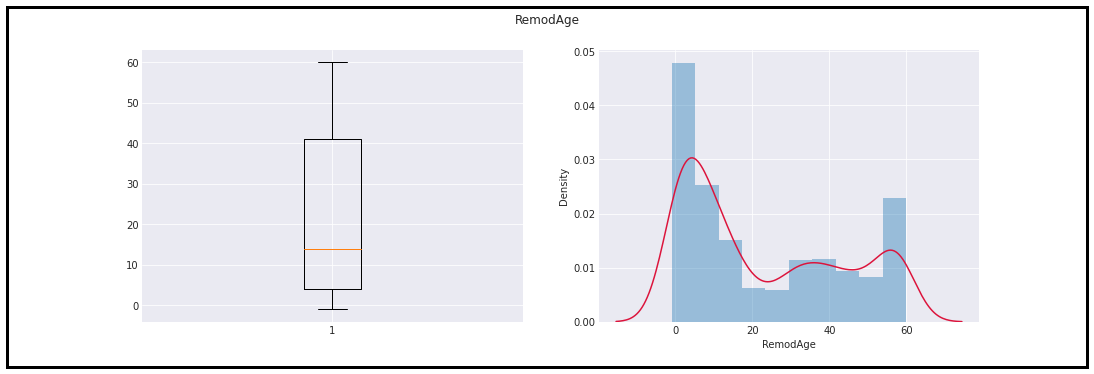

In [18]:
plot_hist_box(df_train.RemodAge)

In [19]:
df_test['House_Age'] = df_test.YrSold - df_test.YearBuilt
df_test['RemodAge']  = df_test.YrSold - df_test.YearRemodAdd
df_test.drop(labels=['YrSold','YearBuilt','YearRemodAdd'],inplace=True,axis=1)

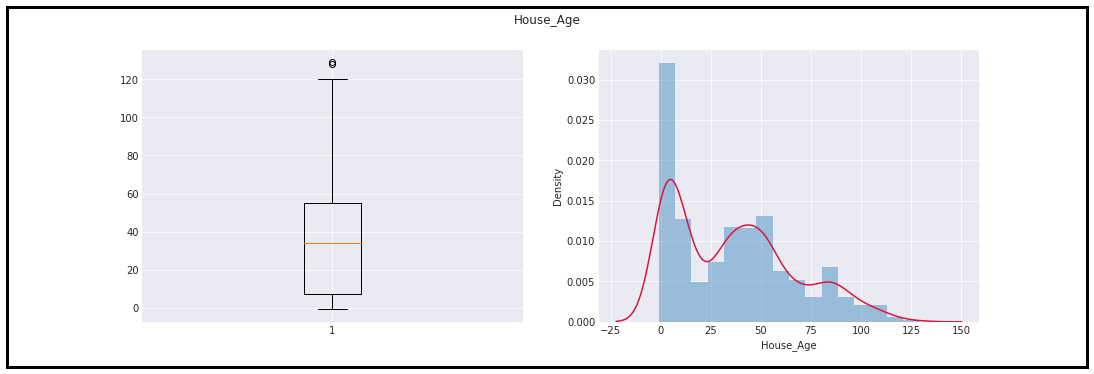

In [20]:
plot_hist_box(df_test['House_Age'])

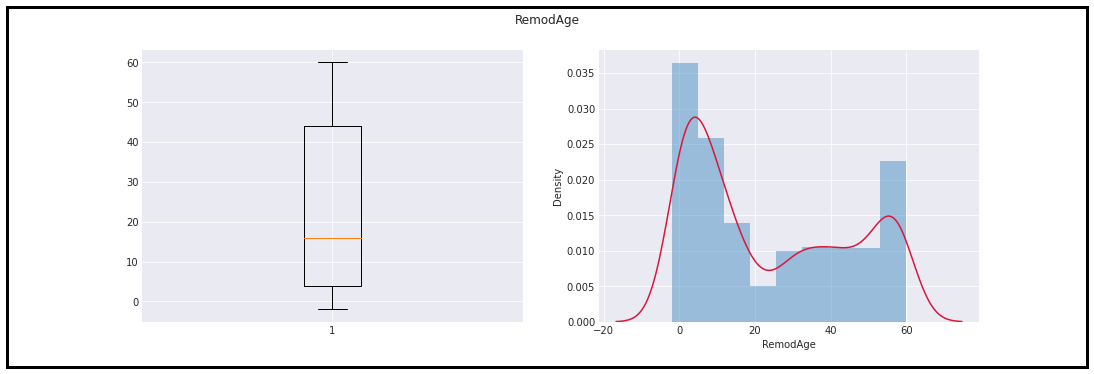

In [21]:
plot_hist_box(df_test['RemodAge'])

In [22]:
## We have over all condition and over all Quality, averaging both can give us an overall rating
# This can be a very good, and will reduce the feature
df_train['Overall_Rating'] = (df_train.OverallCond + df_train.OverallQual)*0.5
df_test['Overall_Rating'] = (df_test.OverallCond + df_test.OverallQual)*0.5
df_train.drop(labels=['OverallQual','OverallCond'],inplace=True,axis=1)
df_test.drop(labels=['OverallQual','OverallCond'],inplace=True,axis=1)

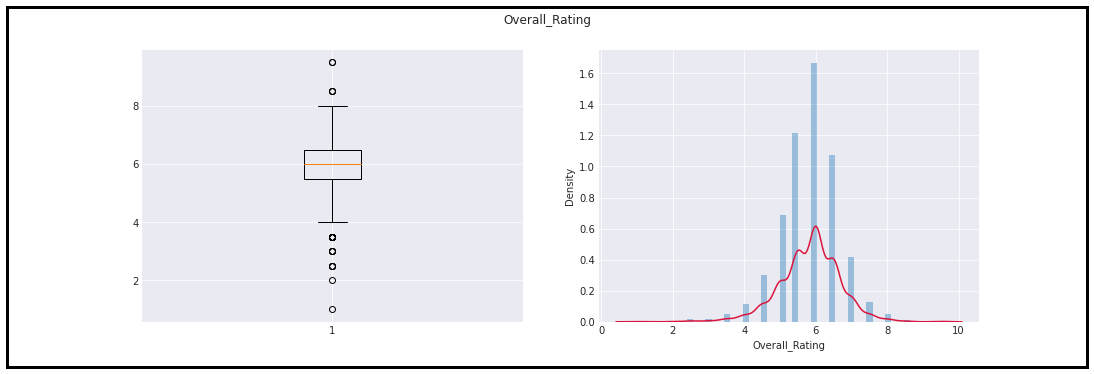

In [23]:
plot_hist_box(df_train.Overall_Rating)

In [24]:
# we have missing Value in LotFrontage but we know that it is very important feature as people are
# looking for the road attached building
# We can see if access to street is available or not by street variable
train.Street.isnull().sum() # 0; so we can clearly say that every building has access to street
# we can't impute LotFrontage with 0;
from sklearn.impute import KNNImputer #Imputing the null value 
df_train['LotFrontage'] = train.LotFrontage
df_test['LotFrontage'] = test.LotFrontage

imputer = KNNImputer(n_neighbors=2)
df_train.LotFrontage = imputer.fit_transform(df_train[['LotFrontage']])
df_test.LotFrontage = imputer.fit_transform(df_test[['LotFrontage']])

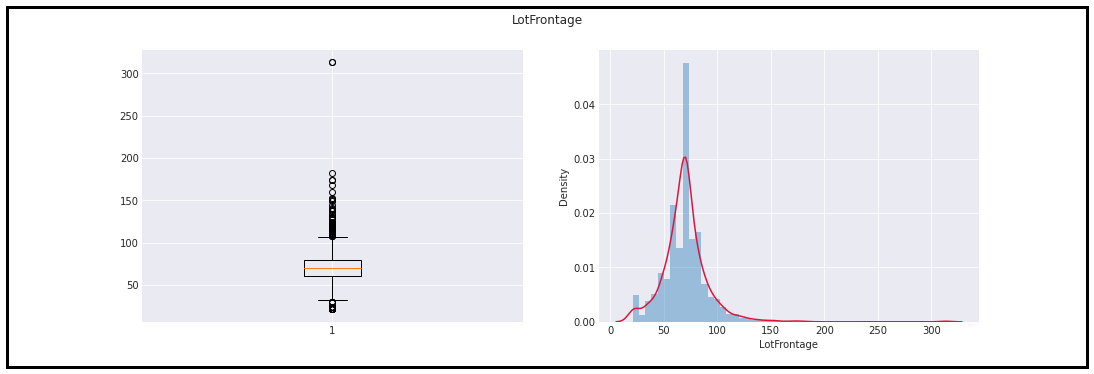

In [25]:
plot_hist_box(df_train.LotFrontage)

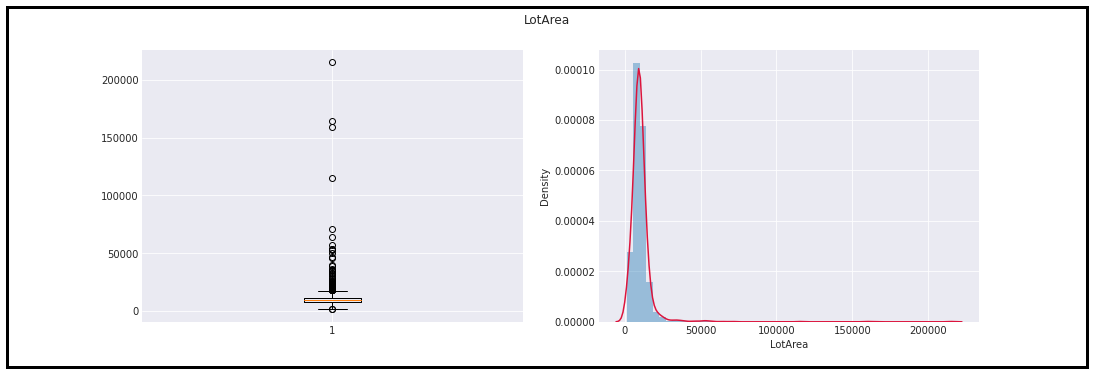

In [26]:
plot_hist_box(df_train.LotArea)

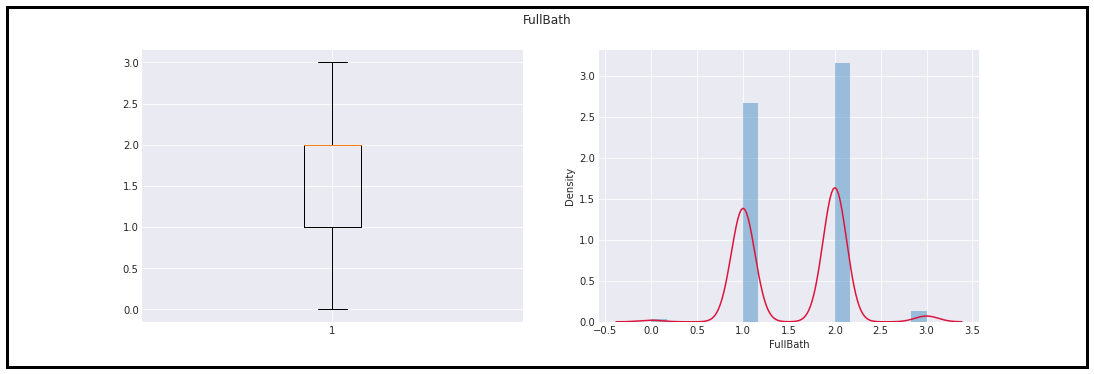

In [27]:

plot_hist_box(df_train.FullBath)

LotArea is highly right-tailed. 


LotFrontage after the imputation is slightly near to normal, but still we can see some tail.


We can check for outlier-percentage in both.

In [28]:
# MSSubClass is a categorical variable as given in data description We can have a one hot encoding

# we have addition {150} in the df_test.MSSubClass label so directly one-hot encoding will not give 
# correct shape

train_MS_label = set(df_train.MSSubClass.value_counts().index.tolist())
test_MS_label  = set(df_test.MSSubClass.value_counts().index.tolist())
 

print(f"Additional data in test is {test_MS_label-train_MS_label}")


# After getting dummy we have to concate additional column with zero filled 


df_train = pd.get_dummies(df_train,columns=['MSSubClass'])
df_test = pd.get_dummies(df_test,columns=['MSSubClass'])

# Concate Addition {150} column
df_t_0_l = [0]*df_train.shape[0]
df_0 = pd.DataFrame(df_t_0_l,columns=['MSSubClass_150'])
df_train = df_train.join(df_0)


Additional data in test is {150}


In [29]:
df_train.columns[df_train.dtypes != 'O']

Index(['Id', 'LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
       'House_Age', 'RemodAge', 'Overall_Rating', 'LotFrontage',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_150'],
      dtype='object')

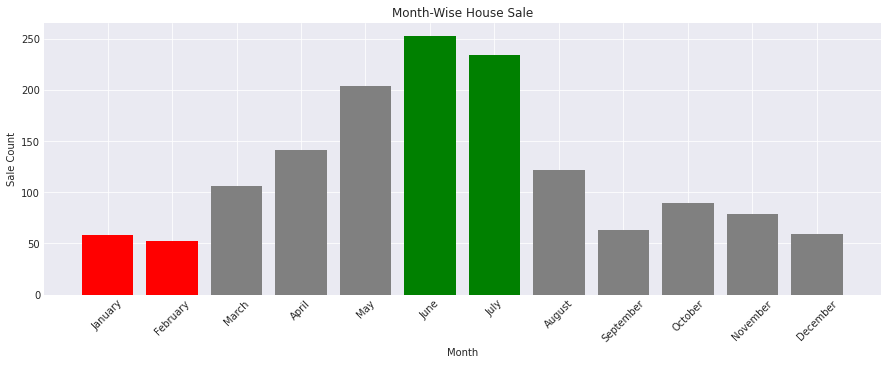

In [30]:
# Checking Highest sale by the Month of Sold
import datetime
from calendar import month_name
from collections import OrderedDict

x = lambda x : datetime.date(1900, x, 1).strftime('%B')
month = list(map(x,df_train.MoSold.value_counts().index.to_list()))
sale_count = df_train.MoSold.value_counts().to_list()
month_sale = dict(zip(month,sale_count))
monthj = list(month_name)
monthj.remove('')
month_sale = OrderedDict([(a, month_sale[a]) for a in monthj])
plt.figure(figsize=(15,5))
colors = ['r','r','gray','gray','gray','g','g','gray','gray','gray','gray','gray']
plt.bar(month_sale.keys(),month_sale.values(),color=colors)
plt.title('Month-Wise House Sale')
plt.ylabel('Sale Count')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

In [31]:
#We can see that that all the month are not comman for sale, we have highest sale during the summer.
#Lowest sale in the month of Jan and Feb

In [32]:
# Since MoSold is a categorical variable so we have to have one hot encoding,we can drop the first value

df_train = pd.get_dummies(df_train,columns=['MoSold'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['MoSold'],drop_first=True)

In [33]:
df_train = pd.get_dummies(df_train,columns=['SaleCondition'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['SaleCondition'],drop_first=True)

In [34]:
# Exterior Quality and Exterior condition check the material on the  exterior side, we will be merging both the rating
label = {'None':0,'Ex':5, 'Gd':4,'TA':3,'Fa':2,'Po':1}
df_train.ExterQual.fillna('None',inplace=True)
df_test.ExterQual.fillna('None',inplace=True)
df_train.replace({'ExterQual':label},inplace=True)
df_test.replace({'ExterQual':label},inplace=True)

df_train.ExterCond.fillna('None',inplace=True)
df_test.ExterCond.fillna('None',inplace=True)
df_train.replace({'ExterCond':label},inplace=True)
df_test.replace({'ExterCond':label},inplace=True)

df_train['External_QC'] = (df_train.ExterCond + df_train.ExterQual)*0.5
df_test['External_QC'] = (df_test.ExterCond + df_test.ExterQual)*0.5

df_train.drop(labels=['ExterQual','ExterCond'],inplace=True,axis=1)
df_test.drop(labels=['ExterQual','ExterCond'],inplace=True,axis=1)

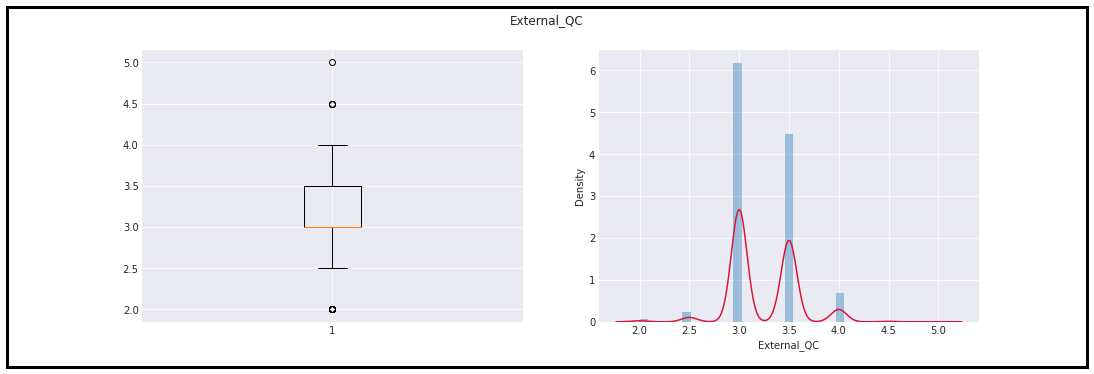

In [35]:
plot_hist_box(df_train.External_QC)

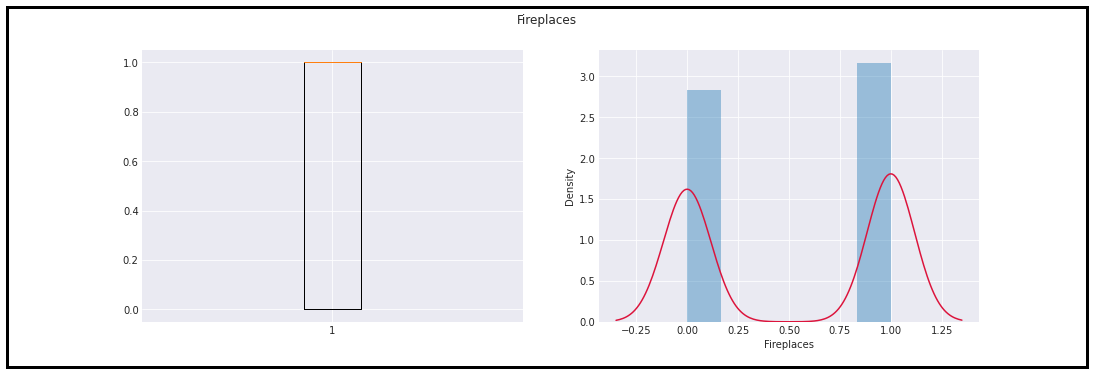

In [36]:
# Let's look at the Fireplaces count in houses, we will be converting to bimodular , either fireplace there or not
df_train.Fireplaces = (df_train.Fireplaces>0).astype(int)
plot_hist_box(df_train.Fireplaces)

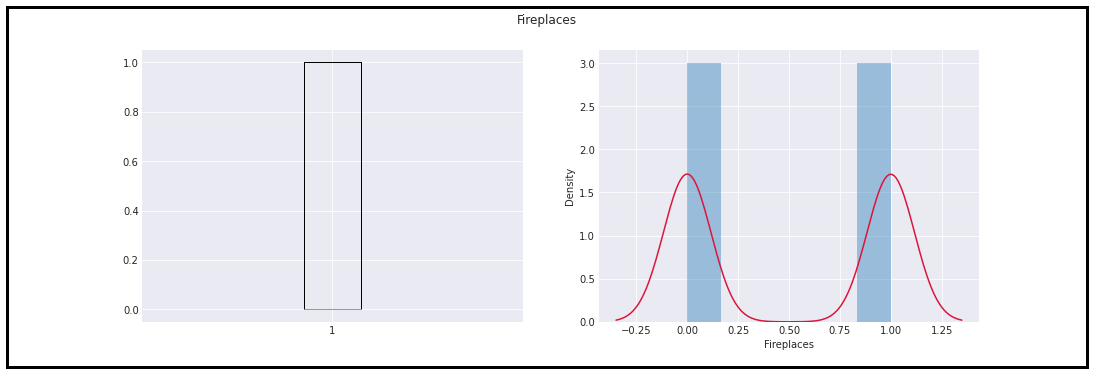

In [37]:
# Let's look at the Fireplaces count in houses, we will be converting to bimodular , either fireplace there or not
df_test.Fireplaces = (df_test.Fireplaces>0).astype(int)
plot_hist_box(df_test.Fireplaces)

In [38]:
# Encoding the Steet with 0 and 1
df_train['Street'].replace(['Pave','Grvl'],[0,1],inplace=True)
df_test['Street'].replace(['Pave','Grvl'],[0,1],inplace=True)

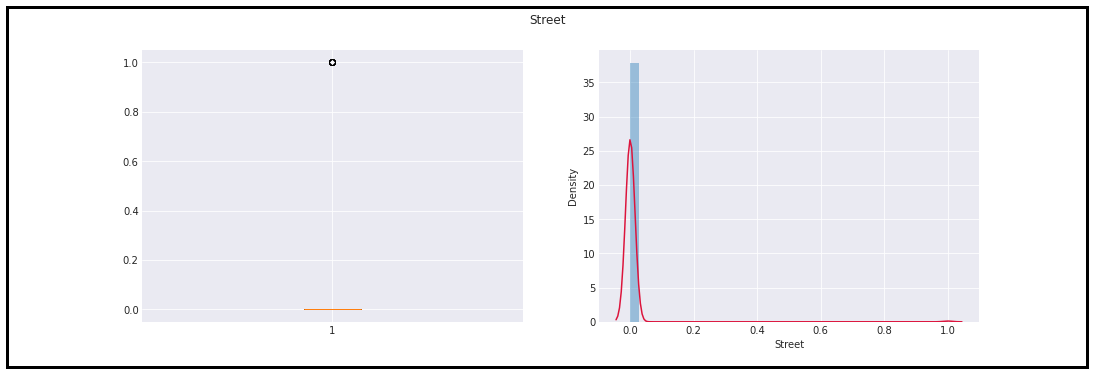

In [39]:
plot_hist_box(df_train.Street)

In [40]:
dum_var = ['LotShape','LandContour','LandSlope','LotConfig','Neighborhood','RoofStyle','PavedDrive','Foundation']

In [41]:
# Creating dummy variable for dum_var
df_train = pd.get_dummies(df_train,columns=dum_var,drop_first=True)
df_test = pd.get_dummies(df_test,columns=dum_var,drop_first=True)

In [42]:
# Encoding Heating Quality
label = {'None':0,'Ex':5, 'Gd':4,'TA':3,'Fa':2,'Po':1}
df_train.HeatingQC.fillna('None',inplace=True)
df_test.HeatingQC.fillna('None',inplace=True)
df_train.replace({'HeatingQC':label},inplace=True)
df_test.replace({'HeatingQC':label},inplace=True)

In [43]:
drop_obj = df_train.columns[df_train.dtypes == 'O'].to_list()
df_train.drop(labels=drop_obj,inplace=True,axis=1)
df_test.drop(labels=drop_obj,inplace=True,axis=1)

In [44]:
df_train['Fence'] = train.Fence
df_test['Fence'] = test.Fence

df_train.fillna(0,inplace=True)
df_test.fillna(0,inplace=True)

In [45]:
# Checking if fence is available or not
df_train.Fence = (df_train.Fence!=0).astype(int)
df_test.Fence = (df_test.Fence!=0).astype(int)

# Training the Model

In [46]:
X = df_train.drop('SalePrice',axis=1)
y = df_train[['SalePrice']]

print(X.shape)
print(y.shape)

(1460, 107)
(1460, 1)


In [47]:
# Spliting the data into test and train sample in 20:80 ratio
from sklearn.model_selection import train_test_split #Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data:{}".format(X_train.shape[0]))
print("Testing Data:{}".format(X_test.shape[0]))

Training Data:1168
Testing Data:292


In [48]:


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #metrics for examining the model

In [49]:
from sklearn.linear_model import Lasso,LinearRegression #Linear model
Linear_Model = LinearRegression()
Linear_Model.fit(X_train,y_train)

LinearRegression()

In [50]:
pred = Linear_Model.predict(X_test) #Prediction on test data  
pred_train = Linear_Model.predict(X_train) # prediction on train data

In [51]:
 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #metrics for examining the model 
# Mean Absolute Error
print(f"Mean absolute error of test data is {mean_absolute_error(y_test, pred)}")
print(f"Mean absolute error of train data is {mean_absolute_error(y_train, pred_train)}")
# RMSE
print(f"RMSE of test data is {mean_squared_error(y_test, pred , squared=False)}")
print(f"RMSE of train data is {mean_squared_error(y_train, pred_train,squared=False)}")
# R^2
print(f"R^2 of test data is {r2_score(y_test, pred)}")
print(f"R^2 of train data is {r2_score(y_train, pred_train)}")

Mean absolute error of test data is 21640.19300289292
Mean absolute error of train data is 19094.839122436206
RMSE of test data is 35444.99157735151
RMSE of train data is 29831.1122971001
R^2 of test data is 0.8362067800009187
R^2 of train data is 0.8508026248046483


In [52]:
res_df = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': pred.flatten()})
res_df['residual'] = res_df['Actual'] - res_df['Predicted']
res_df.head()

,Actual,Predicted,residual
0,154500,155205.718030,-705.718030
1,325000,323176.422149,1823.577851
2,115000,108653.453558,6346.546442
3,159000,172318.844192,-13318.844192
4,315500,277435.909411,38064.090589


In [53]:
predict = Linear_Model.predict(df_test)
ts = pd.read_csv('/kaggle/input/hosue-prices/test.csv')

submission = pd.DataFrame()
submission['Id'] = ts.Id
submission['SalePrice'] = predict
submission.to_csv('submission.csv', index=False)

In [54]:
submission.sample(6)

,Id,SalePrice
852,2313,174670.358180
1043,2504,203382.959307
0,1461,125046.099600
1349,2810,112450.318714
479,1940,252957.833863
153,1614,141384.090384
